In [1]:
import opendatasets as od
import pandas as pd
import numpy as np
import math
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib.colors import ListedColormap
from math import sqrt
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])

In [2]:
od.download('https://www.kaggle.com/datasets/erdemtaha/cancer-data?select=Cancer_Data.csv')

Skipping, found downloaded files in "./cancer-data" (use force=True to force download)


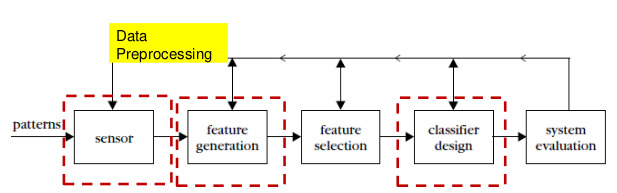

# Reading Data

In [3]:
cancer_df=pd.read_csv('cancer-data/Cancer_Data.csv')

In [4]:
cancer_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# Data Preprocessing

In [5]:
cancer_df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
cancer_df=cancer_df.drop(['id','Unnamed: 32'],axis=1)

In [7]:
features=list(cancer_df.columns)
features.remove('diagnosis')

In [8]:
cancer_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [10]:
cancer_df.duplicated().sum()

0

In [11]:
cancer_df.nunique()

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

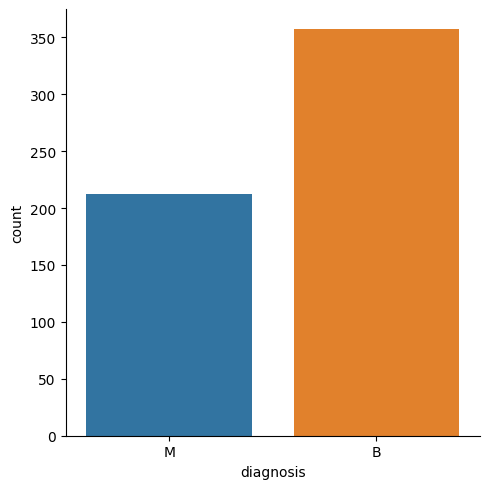

In [12]:
sns.catplot(x="diagnosis", kind="count", data=cancer_df)

/tmp/ipykernel_45043/3235390134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cancer_df[col])


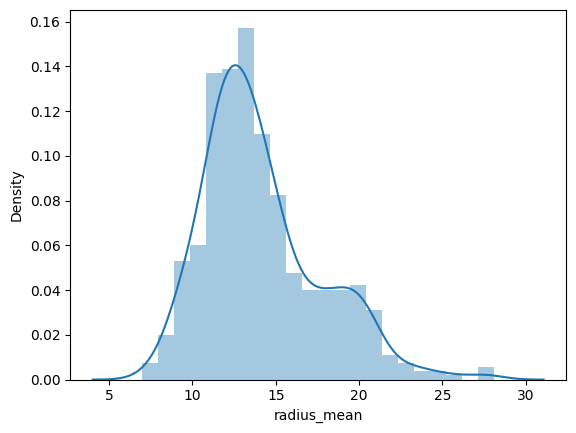

/tmp/ipykernel_45043/3235390134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cancer_df[col])


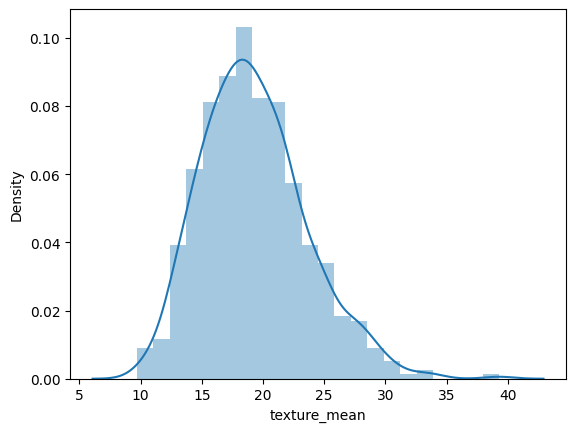

/tmp/ipykernel_45043/3235390134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cancer_df[col])


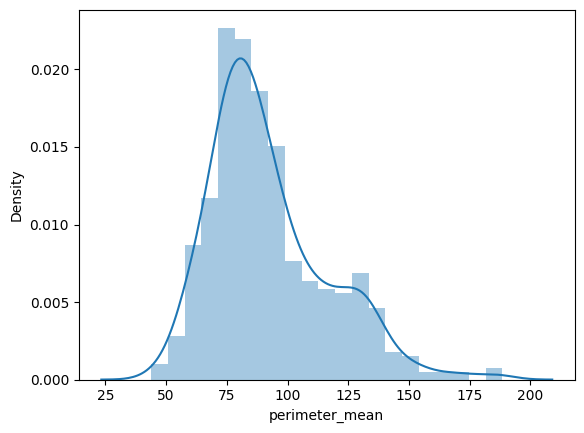

/tmp/ipykernel_45043/3235390134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cancer_df[col])


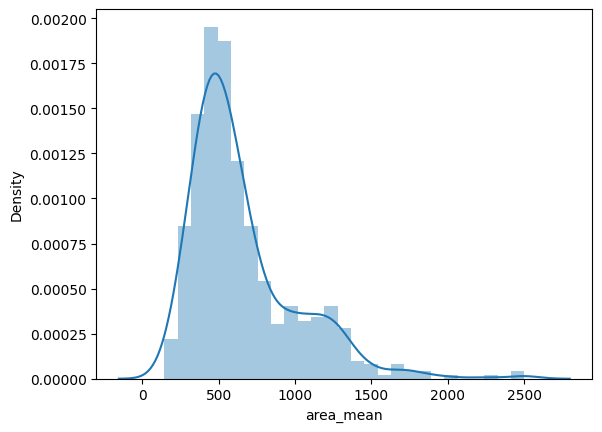

/tmp/ipykernel_45043/3235390134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cancer_df[col])


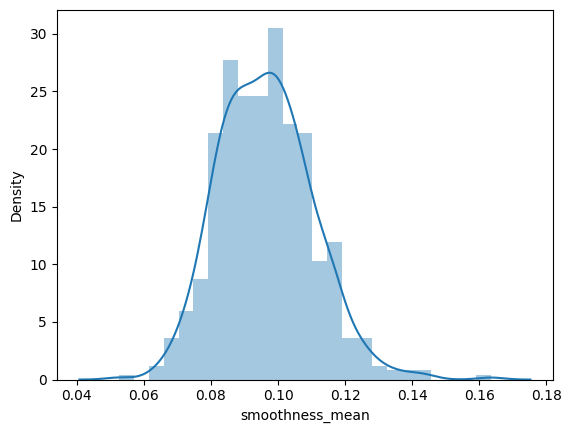

/tmp/ipykernel_45043/3235390134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cancer_df[col])


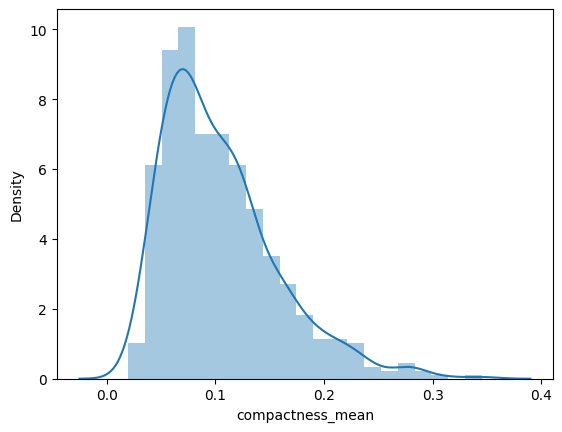

/tmp/ipykernel_45043/3235390134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cancer_df[col])


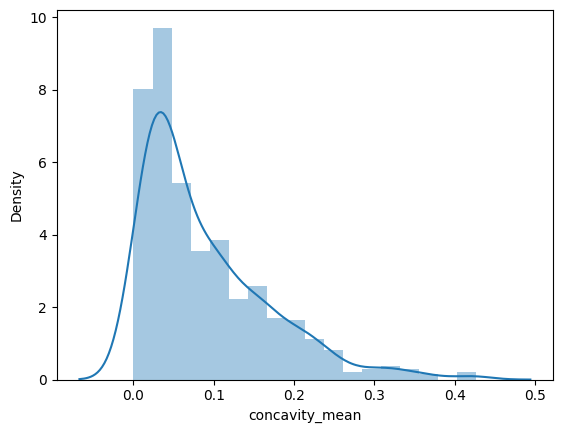

/tmp/ipykernel_45043/3235390134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cancer_df[col])


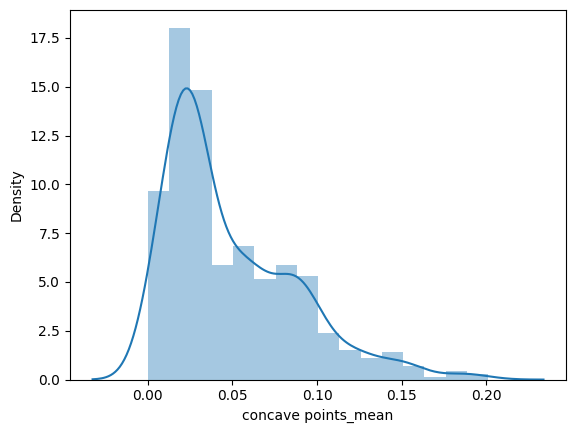

/tmp/ipykernel_45043/3235390134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cancer_df[col])


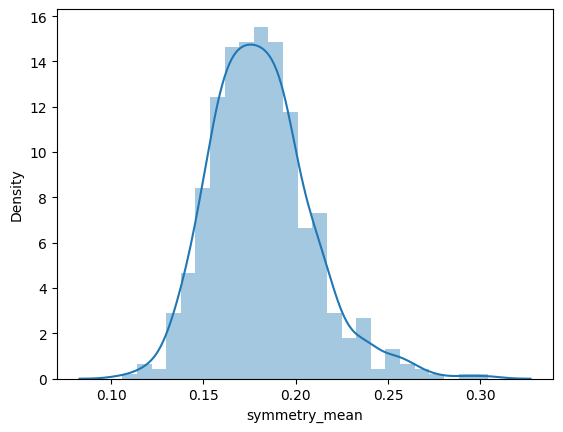

/tmp/ipykernel_45043/3235390134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cancer_df[col])


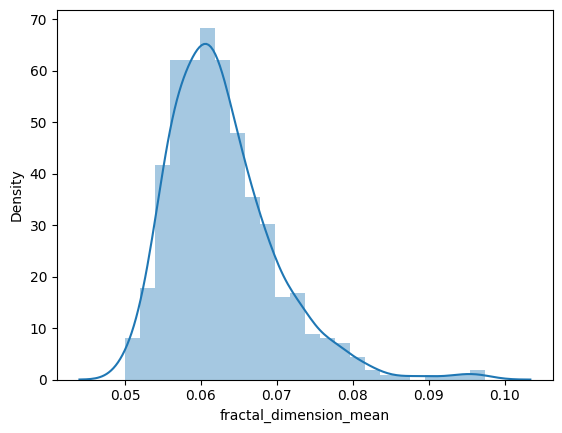

/tmp/ipykernel_45043/3235390134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cancer_df[col])


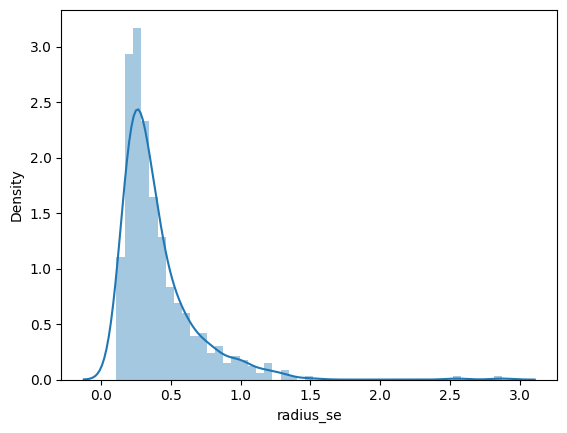

/tmp/ipykernel_45043/3235390134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cancer_df[col])


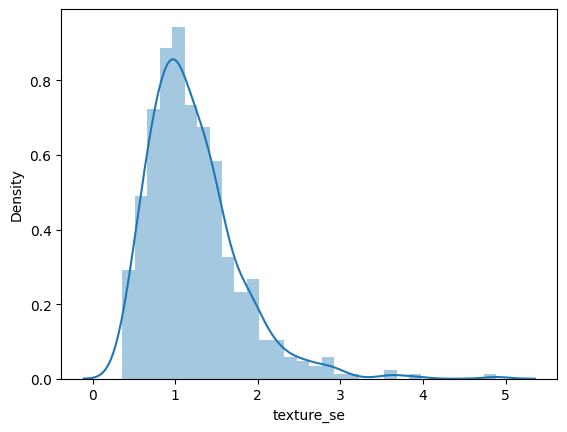

/tmp/ipykernel_45043/3235390134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cancer_df[col])


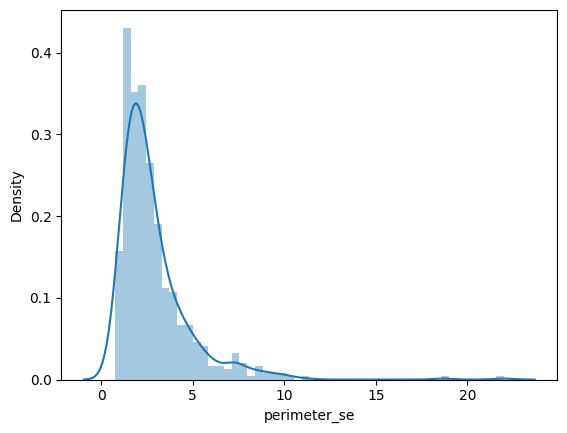

/tmp/ipykernel_45043/3235390134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cancer_df[col])


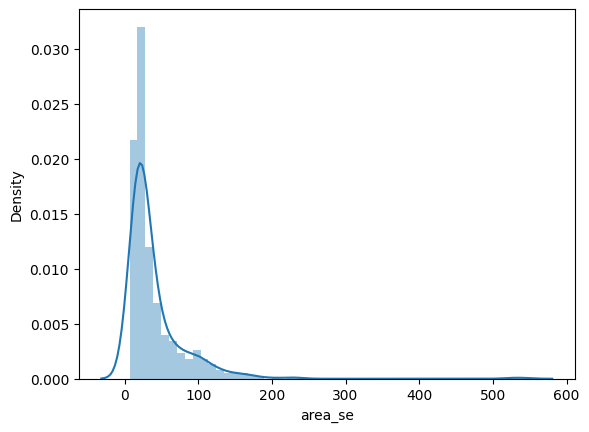

/tmp/ipykernel_45043/3235390134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cancer_df[col])


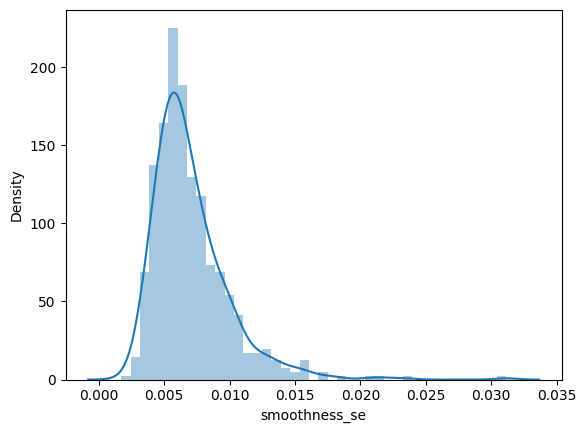

/tmp/ipykernel_45043/3235390134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cancer_df[col])


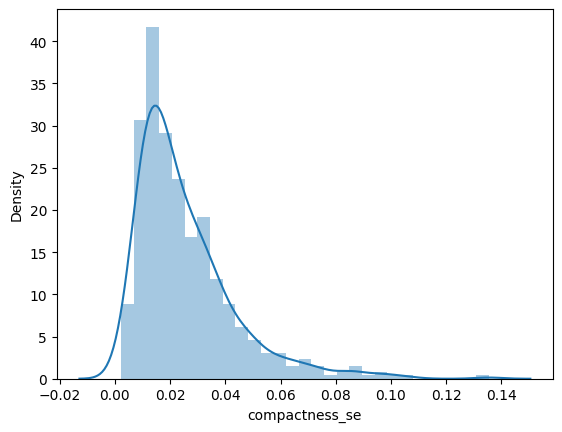

/tmp/ipykernel_45043/3235390134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cancer_df[col])


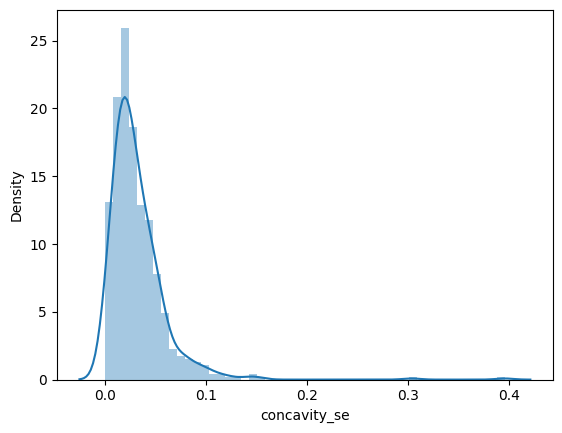

/tmp/ipykernel_45043/3235390134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cancer_df[col])


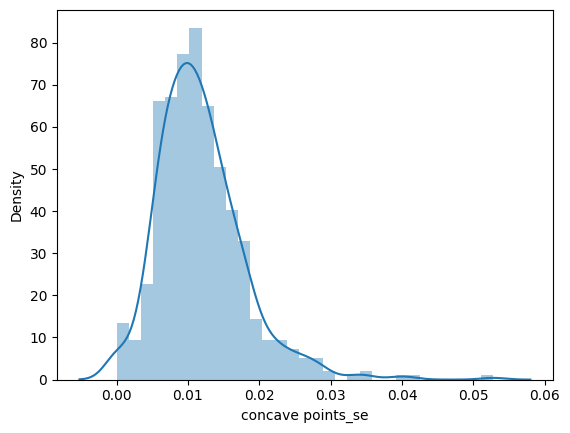

/tmp/ipykernel_45043/3235390134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cancer_df[col])


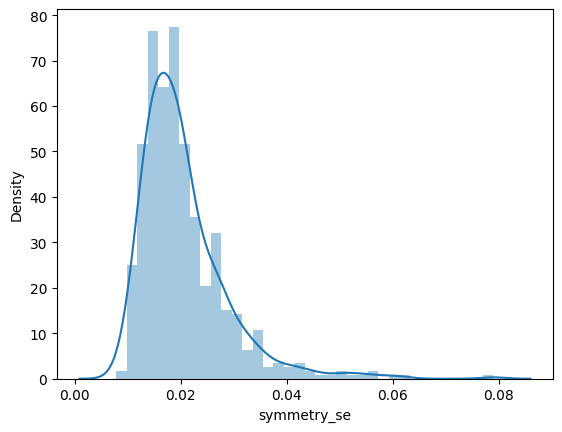

/tmp/ipykernel_45043/3235390134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cancer_df[col])


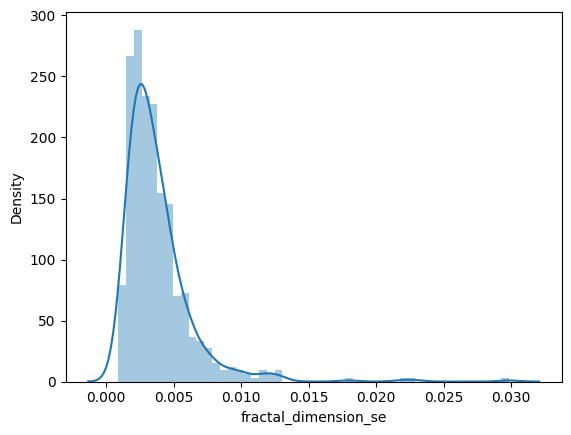

/tmp/ipykernel_45043/3235390134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cancer_df[col])


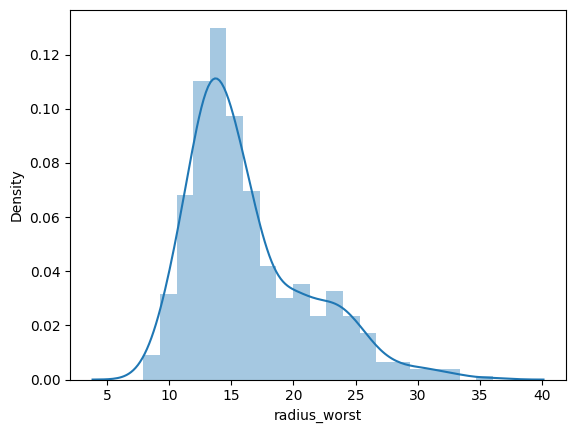

/tmp/ipykernel_45043/3235390134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cancer_df[col])


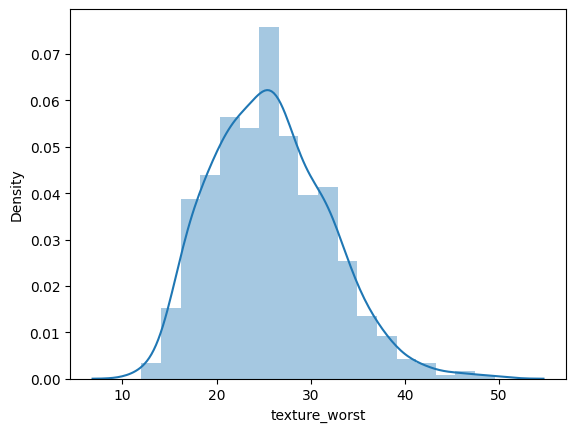

/tmp/ipykernel_45043/3235390134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cancer_df[col])


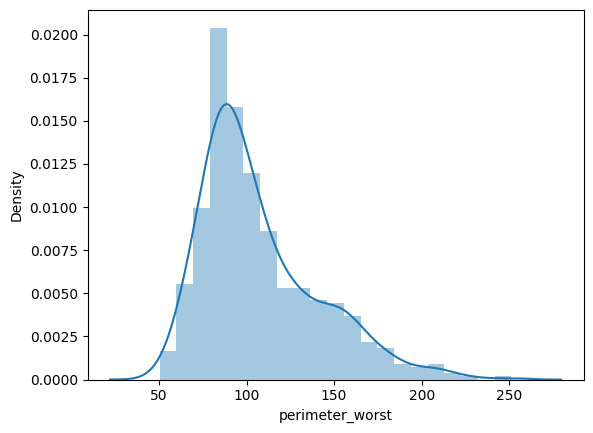

/tmp/ipykernel_45043/3235390134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cancer_df[col])


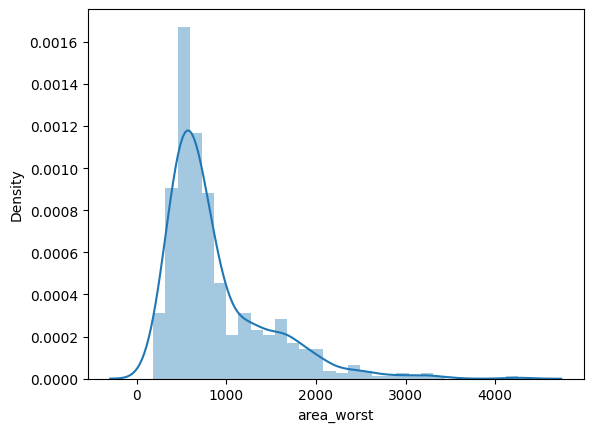

/tmp/ipykernel_45043/3235390134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cancer_df[col])


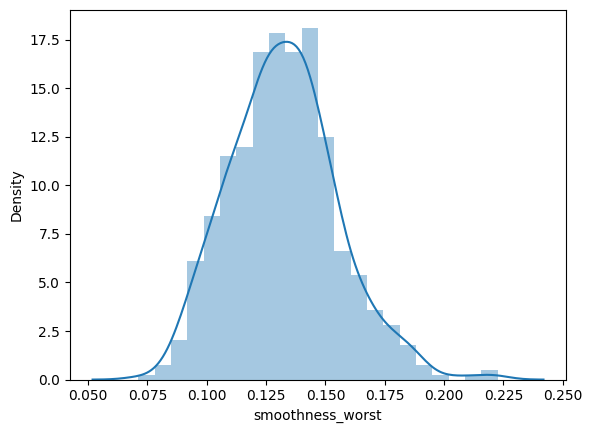

/tmp/ipykernel_45043/3235390134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cancer_df[col])


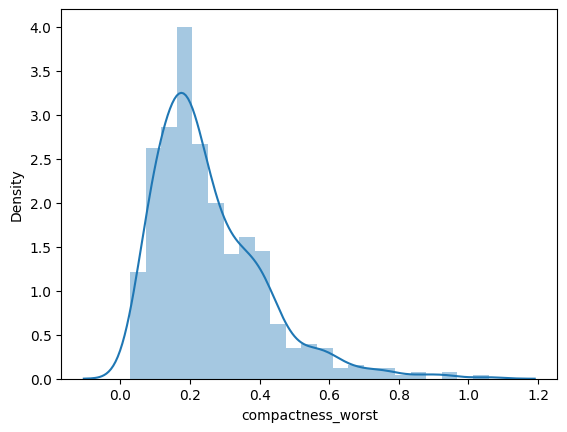

/tmp/ipykernel_45043/3235390134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cancer_df[col])


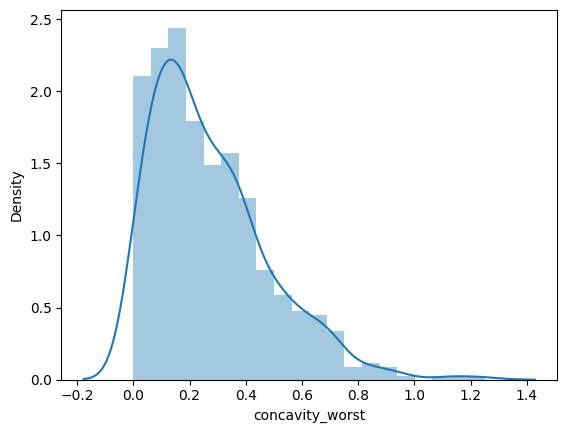

/tmp/ipykernel_45043/3235390134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cancer_df[col])


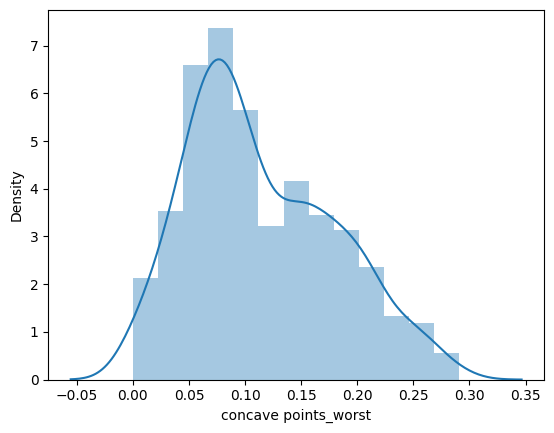

/tmp/ipykernel_45043/3235390134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cancer_df[col])


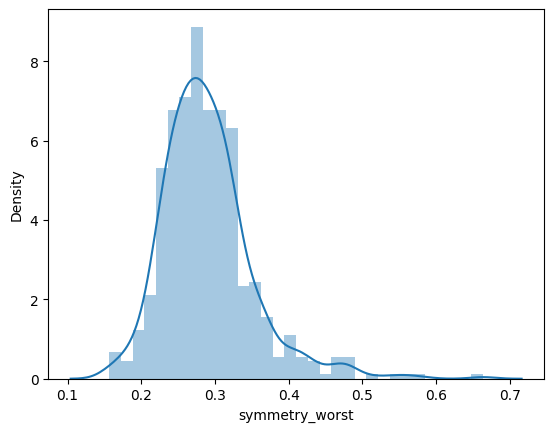

/tmp/ipykernel_45043/3235390134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cancer_df[col])


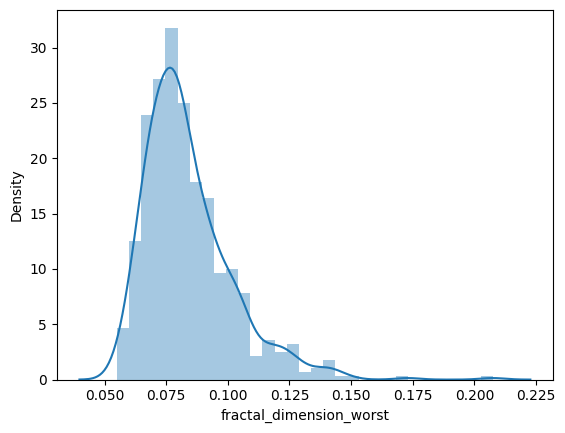

In [13]:
for col in features:
    sns.distplot(cancer_df[col])
    # cancer_df.distplot(column=[col])
    plt.show()


```
B-->0
M-->1 
```

In [14]:
#M-->1 B-->0
cancer_df['diagnosis']=cancer_df['diagnosis'].replace(to_replace=['M', 'B'], value=[1, 0])

In [15]:
cancer_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [16]:
'''
 The Q1 is the 25th percentile of the dataset
 and Q3 is the 75th percentile of the dataset, 
 and IQR represents the interquartile range calculated by Q3 minus Q1 (Q3–Q1). 
 the outlier data points are the ones falling below (Q1–1.5 IQR) or above (Q3 + 1.5 IQR.) 
'''
for col in features:
    q1=cancer_df[col].quantile(0.25)
    q3=cancer_df[col].quantile(0.75)
    IQR=q3-q1
    outliers=cancer_df[(cancer_df[col]<(q1-1.5*IQR))|(cancer_df[col]>(q3+1.5*IQR))]

In [17]:
print('Number of outliers rows: ',len(list(outliers.index)))

Number of outliers rows:  24


In [18]:
print(list(outliers.index))

[3, 5, 9, 14, 15, 26, 31, 34, 72, 105, 118, 151, 152, 181, 190, 229, 242, 252, 379, 465, 504, 505, 562, 567]


In [19]:
cancer_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [20]:
cancer_df_cleaned=cancer_df.drop(list(outliers.index),axis=0)

In [21]:
cancer_df_cleaned

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,1,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [22]:
cancer_df_cleaned.reset_index(drop = True, inplace = True)

In [23]:
cancer_df_cleaned

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873
541,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
542,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
543,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [24]:
cancer_df_cleaned.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

<Axes: >

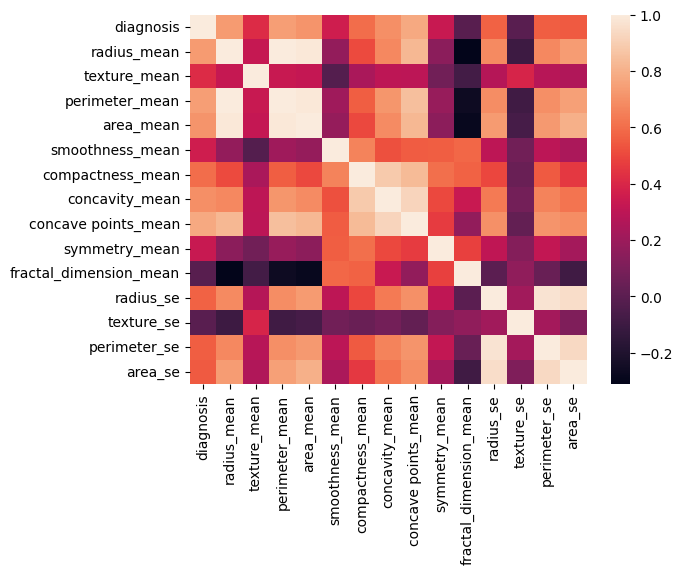

In [25]:
sns.heatmap(cancer_df.iloc[:,:15].corr())

<Axes: >

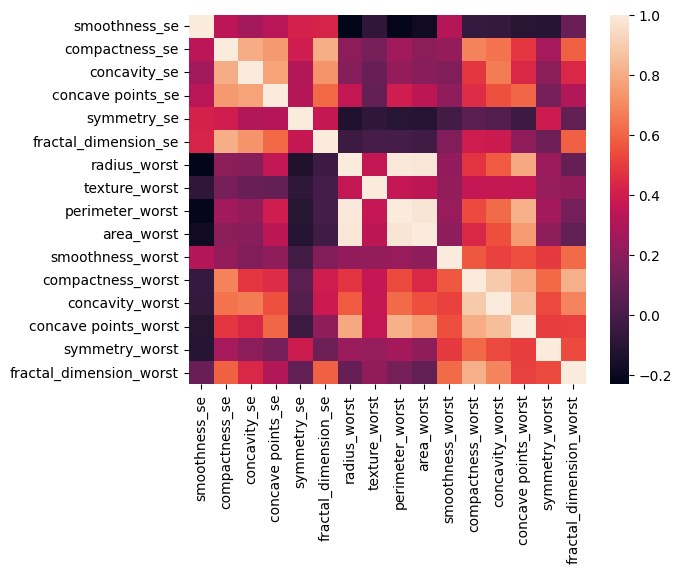

In [26]:
sns.heatmap(cancer_df.iloc[:,15:].corr())

# Feature Selection (Applied Feature Reduction)  

## Apply PCA for Feature Reduction


In [27]:
#get all features and drop unnecessery cols
X_df=cancer_df_cleaned.drop(['diagnosis'],axis=1)
y_df=cancer_df_cleaned['diagnosis']

Text(0, 0.5, 'Variance')

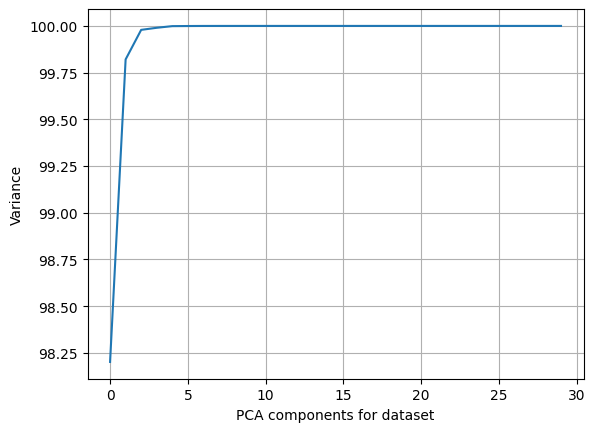

In [28]:
#get the best number of pca componenects that hold much variation of the data
pca_ = PCA()
pca_.fit(X_df)
plt.grid(True)
plt.plot(np.cumsum(pca_.explained_variance_ratio_ * 100))
plt.xlabel('PCA components for dataset')
plt.ylabel('Variance')

In [29]:
X=np.array(X_df)
X_meaned = X - np.mean(X , axis = 0)
X_std = np.std(X, axis=0)
# print (X_meaned)
X=X_meaned/X_std
X

array([[ 1.09035623, -2.07119757,  1.26654513, ...,  2.41303947,
         3.0491068 ,  2.67668756],
       [ 1.82197272, -0.33921136,  1.68170481, ...,  1.170719  ,
        -0.19189403,  0.53272335],
       [ 1.57242911,  0.47639243,  1.56250055, ...,  2.06256115,
         1.31917227,  0.42939977],
       ...,
       [ 1.69720091,  2.11697476,  1.61182645, ...,  0.8077236 ,
        -0.5035624 , -1.0924704 ],
       [ 0.69619076,  2.07713205,  0.6705238 , ...,  0.47915017,
        -1.12339724, -0.24363852],
       [-1.8105882 ,  1.24746613, -1.81139121, ..., -1.73950277,
         0.01997042, -0.80402542]])

In [30]:
cov_mat = np.cov(X_meaned , rowvar = False) 
print (cov_mat.shape)
print (cov_mat)

(30, 30)
[[ 1.24586232e+01  4.71833048e+00  8.57788000e+01  1.23281295e+03
   9.66726733e-03  9.77217806e-02  1.96638201e-01  1.14638949e-01
   1.61173842e-02 -6.85971452e-03  6.79484042e-01 -1.69388255e-01
   4.91997262e+00  1.20283867e+02 -2.17404347e-03  1.44301888e-02
   2.49348414e-02  8.84645120e-03 -2.66127953e-03  4.09254351e-06
   1.65615423e+01  6.30334960e+00  1.14812166e+02  1.89867138e+03
   1.15681060e-02  2.34279304e-01  4.00996945e-01  1.75687087e-01
   3.85189764e-02  2.13045953e-03]
 [ 4.71833048e+00  1.82388571e+01  3.29328752e+01  4.72935082e+02
  -1.63689503e-03  4.62156464e-02  9.51518545e-02  4.59978741e-02
   5.70701020e-03 -2.47972921e-03  3.40194146e-01  9.59510219e-01
   2.49336842e+00  5.17226615e+01  4.19600820e-04  1.27082885e-02
   1.88396895e-02  4.62639770e-03  3.98108978e-04  6.65659603e-04
   7.05786433e+00  2.35850794e+01  4.93373288e+01  8.20474733e+02
   6.52541953e-03  1.40329175e-01  2.21461874e-01  7.50381303e-02
   1.68712063e-02  5.07871587e-0

In [31]:
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
print (sorted_index)
sorted_eigenvalue = eigen_values[sorted_index]
print('sorted_eigenvalue:\n',sorted_eigenvalue)
#similarly sort the eigenvectors
sorted_eigenvectors = eigen_vectors[:,sorted_index]
print('sorted_eigenvectors:\n',sorted_eigenvectors)

[29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6
  5  4  3  2  1  0]
sorted_eigenvalue:
 [4.47896268e+05 7.38485457e+03 7.21153963e+02 5.08612539e+01
 4.01959708e+01 2.77231569e+00 1.74788399e+00 3.71482091e-01
 1.49271396e-01 8.14808990e-02 2.34974140e-02 6.39534603e-03
 2.41402195e-03 1.84667967e-03 1.26206702e-03 6.02911340e-04
 2.71235290e-04 2.15601486e-04 1.76392211e-04 1.55745956e-04
 6.72863318e-05 4.95764066e-05 2.54915437e-05 2.03684207e-05
 1.47933996e-05 1.16568124e-05 3.29437728e-06 2.61881767e-06
 1.87963643e-06 5.24191922e-07]
sorted_eigenvectors:
 [[ 5.06941811e-03 -9.30301579e-03 -1.20802550e-02  3.54866728e-02
  -3.80730397e-02  1.30743749e-01  4.51936729e-02 -7.83057068e-02
  -3.42311677e-01  1.35023289e-01 -5.09781319e-01  6.81055470e-01
  -2.17318415e-01  5.86847915e-02  1.54492615e-01 -1.21012207e-01
  -5.84921899e-02 -9.43869478e-02 -4.43928595e-02 -6.79447383e-02
   5.96009898e-02  1.61325667e-03  2.27372212e-02  2.11696440e-02
   1.53781

In [32]:
X_reduced_with_different_PCA_comp=[]
for n_components in [2,3,4,5,6,7]:
    eigenvector_subset = sorted_eigenvectors[:,0:n_components]
    X_reduced_with_different_PCA_comp.append( np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose())

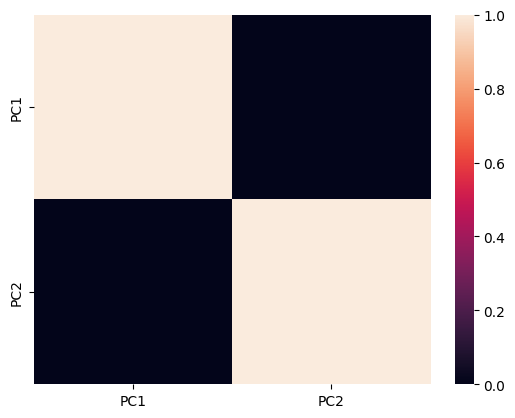

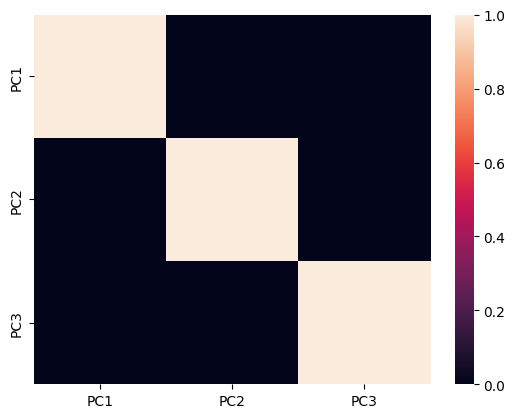

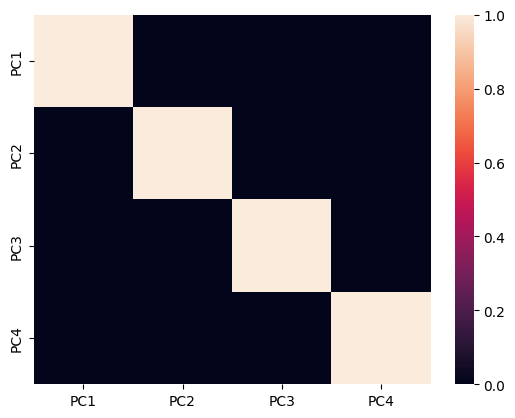

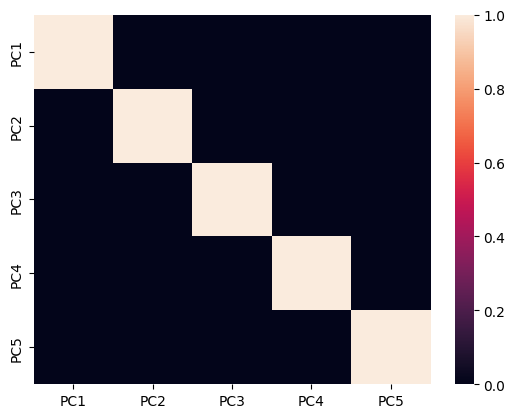

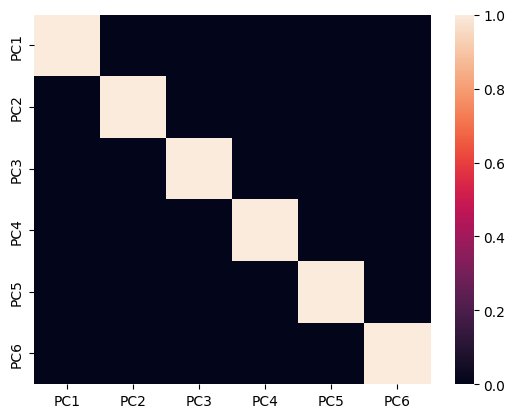

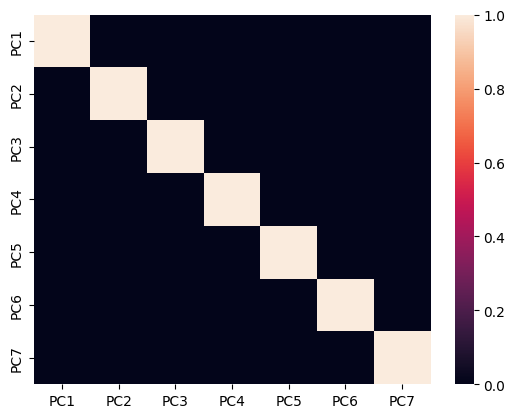

In [33]:
for X_pca in X_reduced_with_different_PCA_comp:
    df_X_pca=pd.DataFrame(X_pca)
    df_X_pca.columns = ['PC{}'.format(i+1) for i in range( X_pca.shape[1]) ]    
    # print(X_pca.shape)
    sns.heatmap(df_X_pca.corr())  
    plt.show()

In [34]:
for X_pca in X_reduced_with_different_PCA_comp:
    print(X_pca.shape,'\n',X_pca,'\n__________')

(545, 2) 
 [[1159.91020837  296.58101839]
 [1268.95340974  -12.90850111]
 [ 995.65777012  -36.54336568]
 ...
 [1044.89852336  -74.42313322]
 [ 314.36178784  -45.22604088]
 [-771.69505597   90.57849806]] 
__________
(545, 3) 
 [[ 1.15991021e+03  2.96581018e+02  4.74535816e+01]
 [ 1.26895341e+03 -1.29085011e+01 -3.66064006e+01]
 [ 9.95657770e+02 -3.65433657e+01 -2.61441920e+00]
 ...
 [ 1.04489852e+03 -7.44231332e+01 -8.21843602e-01]
 [ 3.14361788e+02 -4.52260409e+01 -1.07473305e+01]
 [-7.71695056e+02  9.05784981e+01  2.42172672e+01]] 
__________
(545, 4) 
 [[ 1.15991021e+03  2.96581018e+02  4.74535816e+01  7.68765190e+00]
 [ 1.26895341e+03 -1.29085011e+01 -3.66064006e+01 -1.69984282e+01]
 [ 9.95657770e+02 -3.65433657e+01 -2.61441920e+00 -3.76725504e+00]
 ...
 [ 1.04489852e+03 -7.44231332e+01 -8.21843602e-01  5.61103646e+00]
 [ 3.14361788e+02 -4.52260409e+01 -1.07473305e+01  1.04077502e+01]
 [-7.71695056e+02  9.05784981e+01  2.42172672e+01 -1.77940861e+00]] 
__________
(545, 5) 
 [[ 1.159

# Classifier Design Part (K-Means Clustring)

In [35]:
class K_Means(): 
    def calculate_distance(self,x,centroids):
        dists=[]
        for cent in centroids:
            dists.append(np.sqrt(np.sum((x-cent)**2)))
        # print(dists)
        return np.array(dists)

    def update_centroids(self,centroids,X,pred_labels):
        continue_iter=True
        # print("Centroids before updatating", centroids)
        new_centroids=[]
        for i in range(centroids.shape[0]):
      # print(ith_cent)
          new_centroids.append(np.mean(X[pred_labels==i],axis=0))
        # print("Centroids After updatating", new_centroids)

        if np.array_equal(centroids,new_centroids):
            continue_iter=False
        return np.array(new_centroids),continue_iter 
    def fit(self,X_train,y_train,iter=100):
        self.centroids=self.generate_random_centroids(self.X,self.K)
        # print(self.centroids)
        print('First Generated Centroids:{}'.format(self.centroids))
        for i in range(iter):
            labels=[]
            for xi in X_train:
                x_centroid_distance=self.calculate_distance(xi,self.centroids)
                labels.append(np.argmin(x_centroid_distance))
            # print(labels)
            
            self.centroids,continue_iter=self.update_centroids(self.centroids,X_train,np.array(labels))
            if not continue_iter:
                print("Early Stopping at epoch: {}".format(i+1))
                break
        print('Last Updated  Centroids:{}'.format(self.centroids))
        
        print("\nTraining Evaluation: ")
        self.training_evaluation(self.X_train,y_train)
        return self.centroids
        
    def find_clusters_real_eq(self,X_clusters_pred,X_clusterd):
        for i in range(self.K):
            n_common=0
            x_ith_pred=X_clusters_pred[i]
            x_ith=X_clusterd[i][0]
            for x in x_ith_pred:
                if np.any(np.all(x_ith == x, axis=1)):
                    n_common+=1
            print("Predicted Cluster No {} has {} commone element with Original Cluster No {} out of {} elements "
                  .format(i,n_common,i,X_clusterd[i][0].shape[0]))
        # for x_cl_pred,x_cl in zip(X_clusters_pred,X_cluster):
    def training_evaluation(self,X_test,y_test):
        y_hat=[]
        X_cl=[[]for i in range(0,self.K)]
        for x in X_test:
            y_=np.argmin(self.calculate_distance(x,self.centroids))
            y_hat.append(y_)
            X_cl[y_].append(x)
        #Evaluation
        self.find_clusters_real_eq(X_cl,self.X_train_clusterd)
        wrong_test=0
        for y_h,y in zip(np.array(y_hat),y_test):
            if y_h!=y:
                wrong_test+=1
        accuracy=((y_test.shape[0]-wrong_test)/y_test.shape[0])*100
        print('Accuracy= ',accuracy)
        return np.array(y_hat),accuracy
    
    def predict_evaluate(self,X_test,y_test,centroids):
        X_test_clusterd=self.cluster_test(X_test,y_test,self.K)
        y_hat=[]
        X_cl=[[]for i in range(0,self.K)]
        for x in X_test:
            y_=np.argmin(self.calculate_distance(x,self.centroids))
            y_hat.append(y_)
            X_cl[y_].append(x)
        #Evaluation
        self.find_clusters_real_eq(X_cl,X_test_clusterd)
        wrong_test=0
        for y_h,y in zip(np.array(y_hat),y_test):
            if y_h!=y:
                wrong_test+=1
        accuracy=((y_test.shape[0]-wrong_test)/y_test.shape[0])*100
        print('Accuracy= ',accuracy)
        return np.array(y_hat),accuracy
    
    def generate_random_centroids(self,data,K):
        return data[np.random.randint(0,data.shape[0],K)]
    
    def cluster_test(self,X,y,K):
        X_clusterd=[[]for i in range(K)]
        for i in range(K):
            X_clusterd[i].append(X[y==i])
        return X_clusterd
    def __init__(self,X,y,K):
        np.random.seed(48)
        self.X,self.y,self.K=X,y,K
        
        self.X_train,self.X_test,self.y_train,self.y_test=train_test_split(np.array(X),np.array(y),test_size=0.10, random_state=42,shuffle=True)
        
        self.X_train_clusterd =self.cluster_test(self.X_train,self.y_train,self.K)
       
        self.centroids=self.fit(self.X_train,self.y_train,100)
        
        print("\nTesting Evaluation: ")
        
        self.y_pred,self.accuaracy=self.predict_evaluate(self.X_test,self.y_test,self.centroids)
       
        print("\nData Evaluation: ")
        
        self.y_pred_all,self.accuaracy_all=self.predict_evaluate(self.X,self.y,self.centroids)        

In [36]:
K_means_models=[]
for X_pca in X_reduced_with_different_PCA_comp:
    print("__________________\nUsing {} Compnents for Clustring:".format(X_pca.shape[1]))
    k_means=K_Means(X_pca,np.array(y_df),2)
    K_means_models.append(k_means)

__________________
Using 2 Compnents for Classifing:
First Generated Centroids:[[-556.76669024    4.12379068]
 [-373.42518399  -26.37567651]]
Early Stopping at epoch: 7
Last Updated  Centroids:[[-3.05233874e+02  6.51625077e-01]
 [ 1.01957301e+03 -3.78091164e+00]]

Training Evaluation: 
Predicted Cluster No 0 has 311 commone element with Original Cluster No 0 out of 312 elements 
Predicted Cluster No 1 has 116 commone element with Original Cluster No 1 out of 178 elements 
Accuracy=  87.14285714285714

Testing Evaluation: 
Predicted Cluster No 0 has 39 commone element with Original Cluster No 0 out of 39 elements 
Predicted Cluster No 1 has 8 commone element with Original Cluster No 1 out of 16 elements 
Accuracy=  85.45454545454545

Data Evaluation: 
Predicted Cluster No 0 has 350 commone element with Original Cluster No 0 out of 351 elements 
Predicted Cluster No 1 has 124 commone element with Original Cluster No 1 out of 194 elements 
Accuracy=  86.97247706422019
__________________
U

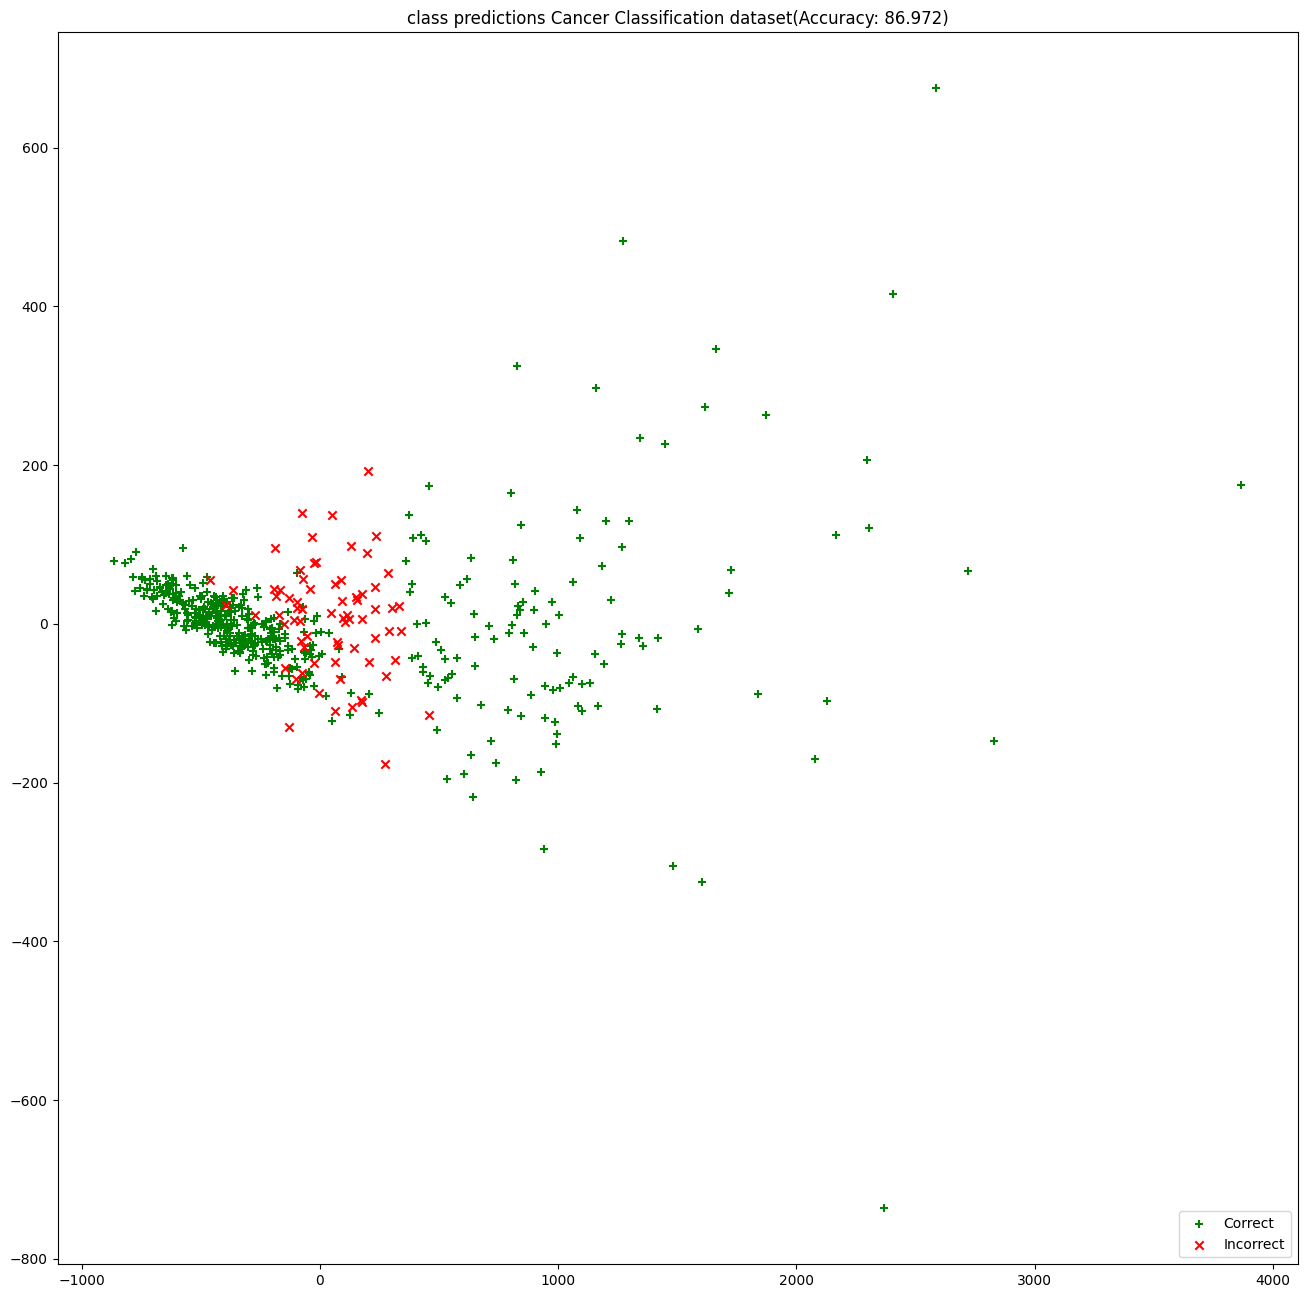

In [37]:
#learner_wine plotting
right_pred = (k_means.y_pred_all == k_means.y)
x=X_pca[:,0]
y=X_pca[:,1]
fig, ax = plt.subplots(figsize=(16, 16))
ax.scatter(x=x[right_pred],  y=y[right_pred],  c='g', marker='+', label='Correct' )
ax.scatter(x=x[~right_pred], y=y[~right_pred], c='r', marker='x', label='Incorrect')
ax.legend(loc='lower right')
ax.set_title("class predictions Cancer Classification dataset(Accuracy: {score:.3f})".format(score=k_means.accuaracy_all))
plt.show()

Text(0.5, 1.0, 'Predicted Predictions for test part')

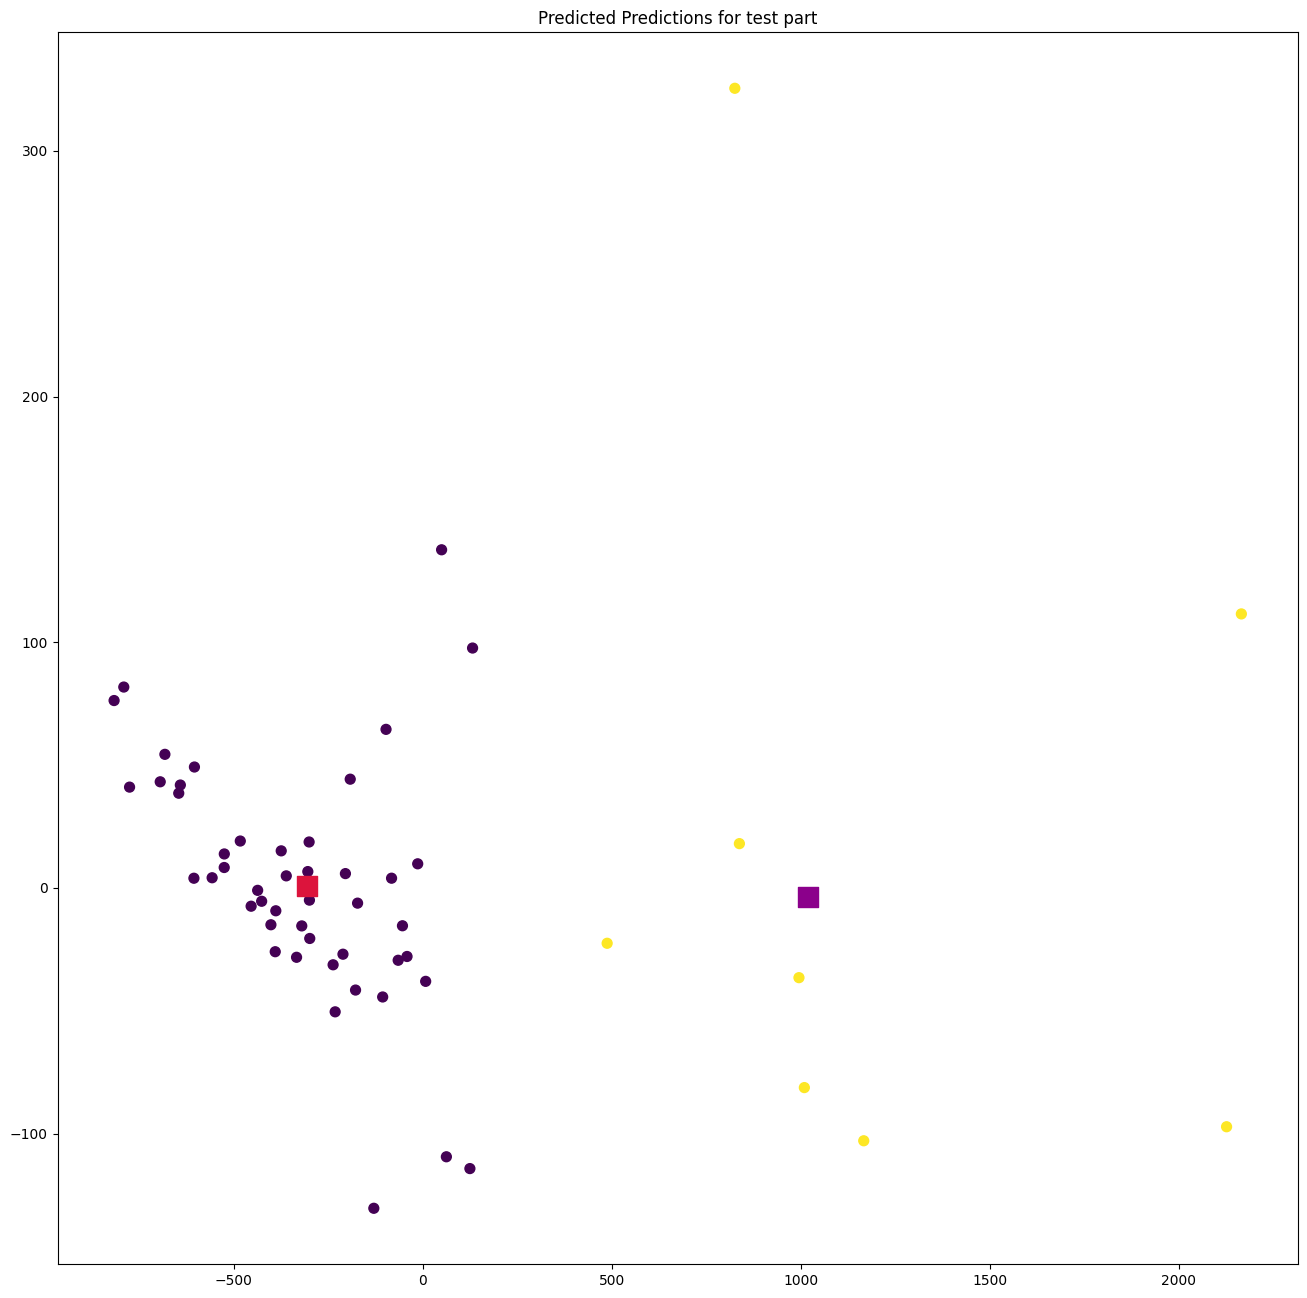

In [38]:
fig, ax = plt.subplots(figsize=(16, 16))
plt.scatter(x=k_means.X_test[:, 0], y=k_means.X_test[:, 1], c=k_means.y_pred, cmap='viridis', s=50)
plt.scatter(x=k_means.centroids[:, 0], y=k_means.centroids[:, 1], c=[0, 1], marker = 's',cmap = customcmap, s=200)
plt.title('Predicted Predictions for test part')

Text(0.5, 1.0, 'Real Predictions for test part')

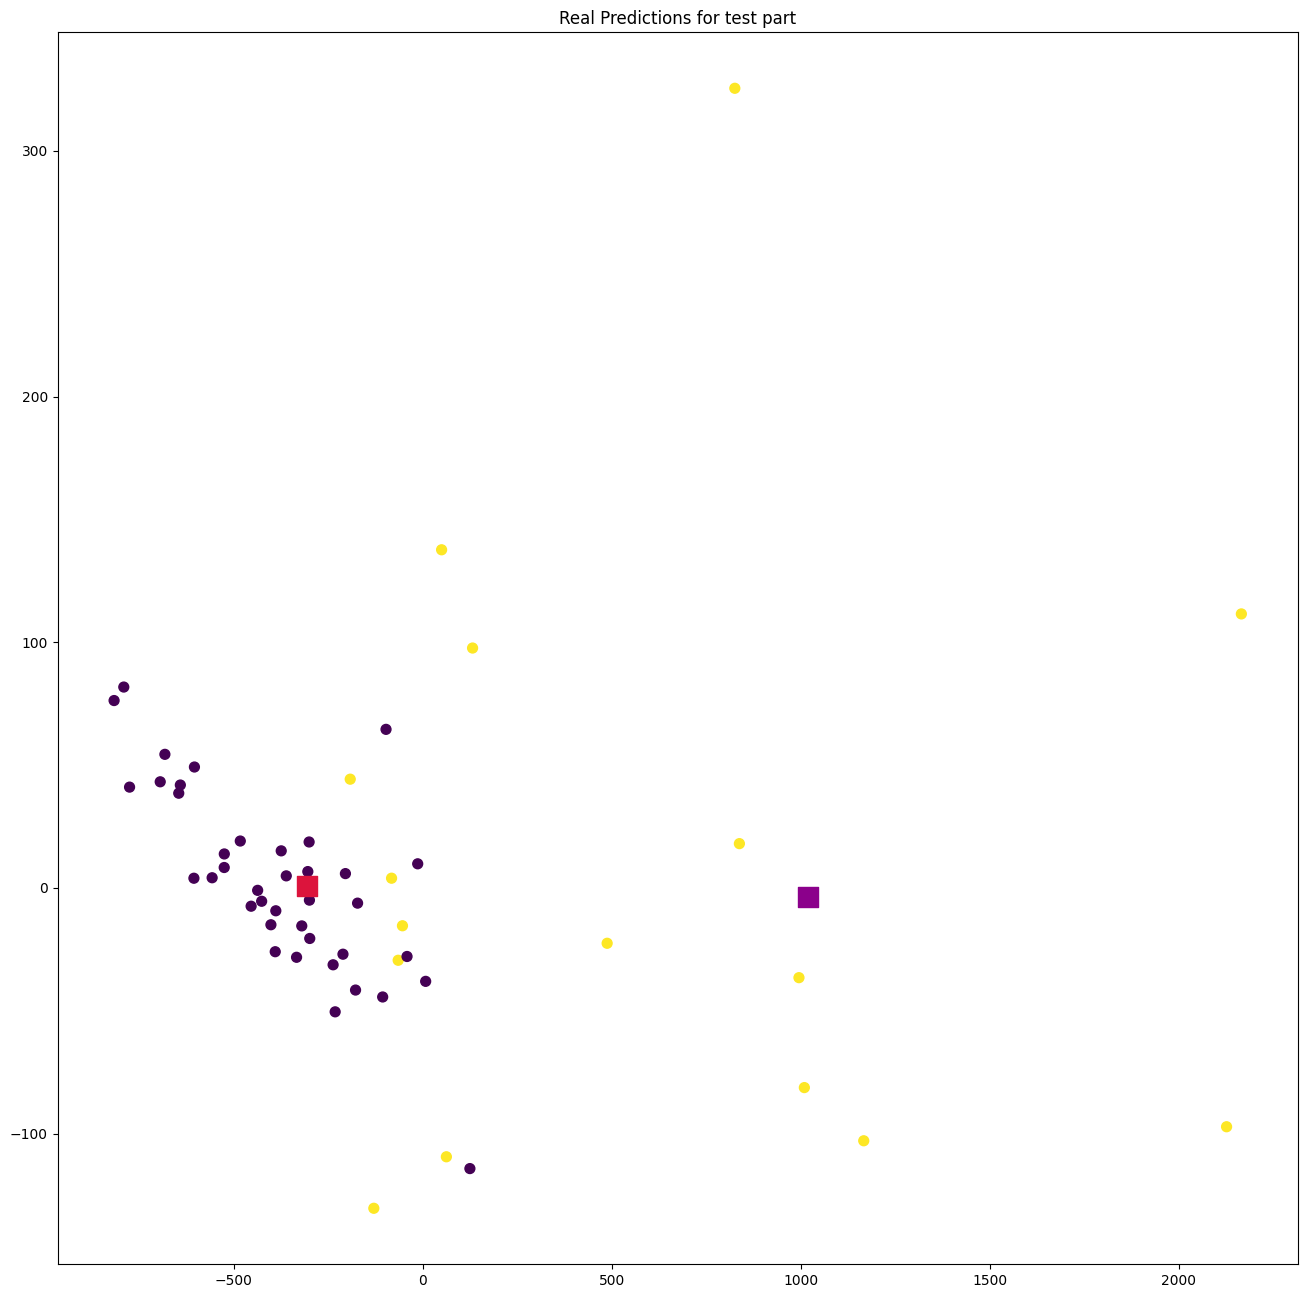

In [39]:

from matplotlib.colors import ListedColormap
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])

fig, ax = plt.subplots(figsize=(16, 16))
plt.scatter(x=k_means.X_test[:, 0], y=k_means.X_test[:, 1], c=k_means.y_test, cmap='viridis', s=50)
plt.scatter(x=k_means.centroids[:, 0], y=k_means.centroids[:, 1], c=[0, 1], marker = 's',cmap = customcmap, s=200)
plt.title('Real Predictions for test part')

# KNN (K-Nearest Neightbour)

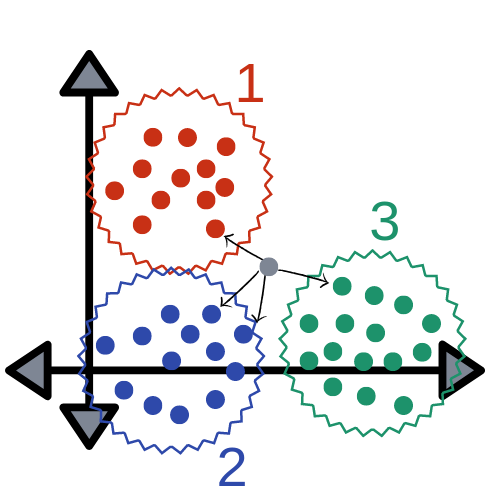

In [82]:
class KNN:
    def distance(self,x,X):
        return sqrt(np.sum((x-X)**2))
    def fit(self, X_train,y_train):
        self.X_train=X_train
        self.y_train=y_train
    def predict(self,X_test,K):
        y_pred=[]
        for x in X_test:
            dist_vals=[]
            for i in range(self.X_train.shape[0]):
                dist_vals.append((self.distance(x,self.X_train[i]),self.y_train[i]))
            dist_vals=sorted(dist_vals,key=lambda x:x[0])[:K]
            dist_vals=np.array(dist_vals)
            classes_val=np.unique(dist_vals[:,1],return_counts=True)
            index=classes_val[1].argmax()
            output=classes_val[0][index]
            y_pred.append(int(output))
        return np.array(y_pred)
    def evaluate(self):
        wrong_test=0
        wrongs=list()
        for x,y in zip(self.y_pred,self.y_test):
            if x==y:
                continue
            else:
                wrongs.append((x,y))
                wrong_test+=1
        accuracy=((self.y_pred.shape[0]-wrong_test)/self.y_pred.shape[0])*100
        print('Accuracy= {}%'.format(round(accuracy,3)))
        return accuracy,wrongs
    def __init__(self,X,y,K):
        self.X,self.y,self.K=X,y,K
        np.random.seed(48)
        self.X_train,self.X_test,self.y_train,self.y_test=train_test_split(np.array(X),np.array(y),test_size=0.10, random_state=42,shuffle=True)
        self.y_pred=self.predict(self.X_test,self.K)
        self.accuracy,self.missed=self.evaluate()

In [87]:
KNN_models=[]
K_vals=[1,2,3,5,20,50]
for X_pca in X_reduced_with_different_PCA_comp:
    print("__________________\nUsing {} Compnents for Classifing:".format(X_pca.shape[1]))
    
    for k in K_vals:
        print('\nUsing K val={}'.format(k))
        Knn=KNN(X_pca,np.array(y_df),k)
        KNN_models.append(Knn)

__________________
Using 2 Compnents for Classifing:

Using K val=1
Accuracy= 89.091%

Using K val=2
Accuracy= 89.091%

Using K val=3
Accuracy= 87.273%

Using K val=5
Accuracy= 87.273%

Using K val=20
Accuracy= 85.455%

Using K val=50
Accuracy= 87.273%
__________________
Using 3 Compnents for Classifing:

Using K val=1
Accuracy= 89.091%

Using K val=2
Accuracy= 89.091%

Using K val=3
Accuracy= 87.273%

Using K val=5
Accuracy= 87.273%

Using K val=20
Accuracy= 85.455%

Using K val=50
Accuracy= 87.273%
__________________
Using 4 Compnents for Classifing:

Using K val=1
Accuracy= 87.273%

Using K val=2
Accuracy= 89.091%

Using K val=3
Accuracy= 87.273%

Using K val=5
Accuracy= 89.091%

Using K val=20
Accuracy= 85.455%

Using K val=50
Accuracy= 87.273%
__________________
Using 5 Compnents for Classifing:

Using K val=1
Accuracy= 87.273%

Using K val=2
Accuracy= 89.091%

Using K val=3
Accuracy= 87.273%

Using K val=5
Accuracy= 89.091%

Using K val=20
Accuracy= 85.455%

Using K val=50
Accura